In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy import stats
import re
import seaborn as sns

## Titanic

Traigo el Dataframe de Titanic y cambio los valores de las columnas.

In [156]:
titanic = pd.read_csv("./Titanic.csv", index_col = "PassengerId")
titanic.columns = ["sobrevivio", "clase", "nombre", "sexo", "edad", "hermanos", "padres", "ticket", "precio", "cabina", "puerto"]
#C = Cherburgo, Q = Queenstown, S = Southampton
titanic.head(2)

,sobrevivio,clase,nombre,sexo,edad,hermanos,padres,ticket,precio,cabina,puerto
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Ejercicios Pandas

¿Cuál es la edad promedio de los pasajeros?

In [157]:
promedio_edad_total = titanic["edad"].mean()
print(f"Promedio de edad de los pasajeros: {int(promedio_edad_total)}")

Promedio de edad de los pasajeros: 29


¿Cuántos hombres y mujeres había a bordo?

In [158]:
hombres_arriba = titanic[titanic["sexo"] == "male"].shape[0]
mujeres_arriba = titanic[titanic["sexo"] == "female"].shape[0]
print(f"Hombres a bordo: {hombres_arriba}\nMujeres a bordo: {mujeres_arriba}")

Hombres a bordo: 577
Mujeres a bordo: 314


¿Cuál fue la tarifa más alta que se pagó por un boleto?

In [159]:
tarifa_alta = titanic["precio"].max()
print(f"Tarifa mas alta: ${round(tarifa_alta, 2)}")

Tarifa mas alta: $512.33


¿Cuál fue la edad de la persona más joven a bordo?

In [160]:
persona_joven = titanic["edad"].min()
print(f"Persona mas joven: {persona_joven}")

Persona mas joven: 0.42


¿Cuántos pasajeros viajaban solos y cuántos viajaban en familia? (Solos se refiere a aquellos que no tenían hermanos, cónyuge, padres o hijos a bordo).

In [161]:
personas_solas = titanic[titanic["padres"] == 0]
personas_solas = personas_solas[personas_solas["hermanos"] == 0]
print(f"Cantidad de personas solas: {personas_solas.shape[0]}")

Cantidad de personas solas: 537


¿Cuál fue la tarifa promedio pagada por los pasajeros en cada clase?

In [162]:
tarifa_promedio = titanic["precio"].mean()
print(f"Tarifa promedio: {round(tarifa_promedio, 2)}")

Tarifa promedio: 32.2


¿Cuántos pasajeros embarcaron en cada puerto (Cherbourg, Queenstown, Southampton)?

In [163]:
puerto = titanic["puerto"].value_counts()
print(f"Pasajeros por puerto:\n{puerto}")

Pasajeros por puerto:
S    644
C    168
Q     77
Name: puerto, dtype: int64


¿Cuál fue el porcentaje de supervivencia por género?

In [164]:
sobrev_genero = titanic.groupby("sexo")["sobrevivio"].mean() * 100
round(sobrev_genero, 2)

sexo
female    74.20
male      18.89
Name: sobrevivio, dtype: float64

¿Cuál fue el nombre del pasajero que pagó la tarifa más alta?

In [165]:
indice = titanic["precio"].idxmax()
nombre = titanic["nombre"][indice]
print(f"Nombre de quien pago mas: {nombre} quien pago {round(tarifa_alta, 2)}")

Nombre de quien pago mas: Ward, Miss. Anna quien pago 512.33


¿Cuántos pasajeros tenían una cabina asignada?

In [166]:
pasajeros_cabina = titanic["cabina"].dropna()
print(f"Pasajeros con cabina: {pasajeros_cabina.shape[0]}")

Pasajeros con cabina: 204


¿Cuántos pasajeros viajaron en cada una de las tres clases?

In [167]:
puerto = titanic["clase"].value_counts()
print(f"Pasajeros por clase:\n{puerto.sort_index()}")

Pasajeros por clase:
1    216
2    184
3    491
Name: clase, dtype: int64


¿Cuál fue el porcentaje de sobrevivientes en cada clase?

In [168]:
sob_clase = titanic.groupby("clase")["sobrevivio"].mean() * 100
round(sob_clase, 2)

clase
1    62.96
2    47.28
3    24.24
Name: sobrevivio, dtype: float64

¿Cuál fue la edad promedio de los pasajeros en cada una de las tres clases?

In [169]:
prom_clase = titanic.groupby("clase")["edad"].mean()
round(prom_clase, 0)

clase
1    38.0
2    30.0
3    25.0
Name: edad, dtype: float64

¿Cuántos pasajeros a bordo tenían hermanos o cónyuges? ¿Cuántos tenían padres o hijos?

In [170]:
pasajeros_hermanos = titanic[titanic["hermanos"] != 0].shape[0]
pasajeros_padres = titanic[titanic["padres"] != 0].shape[0]
print(f"Pasajeros con hermanos o conyuges: {pasajeros_hermanos}\nPasajeros con padres o hijos: {pasajeros_padres}")

Pasajeros con hermanos o conyuges: 283
Pasajeros con padres o hijos: 213


¿Cuántos pasajeros a bordo eran menores de 18 años?

In [171]:
pasajeros_menores = titanic[titanic["edad"] < 18]
print(f"Pasajeros menores a 18 años: {pasajeros_menores.shape[0]}")

Pasajeros menores a 18 años: 113


¿Cuál fue el porcentaje de sobrevivientes entre los pasajeros menores de 18 años?

In [172]:
sobrevivientes_menores_18 = titanic[titanic['edad'] < 18]['sobrevivio'].mean() * 100
print(f"Porcentaje: {round(sobrevivientes_menores_18, 2)}%")

Porcentaje: 53.98%


¿Cuántos pasajeros a bordo tenían un título en su nombre (por ejemplo, "Mr.", "Mrs.", "Dr.", etc.)?

In [173]:
def buscar_titulo(nombre):
    palabras = nombre.split()
    for palabra in palabras:
        if re.search('\w+\.', palabra):
            return True
    return False    

In [174]:
pasajeros_con_titulo = titanic[titanic['nombre'].apply(buscar_titulo)]
total_pasajeros_con_titulo = len(pasajeros_con_titulo)
print(total_pasajeros_con_titulo)

891


¿Cuál fue el número de niños menores de 12 años que sobrevivieron? Para resolver este ejercicio, necesitarás crear una nueva columna que indique si el pasajero es un niño o no (basado en la edad), y luego filtrar las filas que cumplan con este criterio y la columna de sobrevivencia.

In [175]:
titanic2 = titanic.copy()
titanic2["chico"] = titanic2["edad"].apply(lambda x: "Si" if x < 12 else "No")
titanic2.head(2)

,sobrevivio,clase,nombre,sexo,edad,hermanos,padres,ticket,precio,cabina,puerto,chico
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,No


In [176]:
sob_12 = titanic2[(titanic2["chico"] == "Si") & (titanic2["sobrevivio"] == 1)].shape[0]
print(f"Cantidad de menores a 12 años sobrevivientes: {sob_12}")

Cantidad de menores a 12 años sobrevivientes: 39


¿Cuál fue la tarifa media que pagaron los pasajeros de cada clase? Para resolver este ejercicio, necesitarás agrupar el dataframe por la columna de clase y luego calcular la media de la columna de tarifa.

In [177]:
prom_tarclase = titanic.groupby("clase")["precio"].mean()
round(prom_tarclase, 0)

clase
1    84.0
2    21.0
3    14.0
Name: precio, dtype: float64

¿Cuántas personas compartieron la misma cabina? Para resolver este ejercicio, necesitarás separar los números de cabina en una lista de cadenas (ya que algunas personas compartieron la misma cabina) y luego contar el número de veces que aparece cada número de cabina en la lista.

In [178]:
titanic2.dropna(subset = ["cabina"], inplace = True)
titanic2["cabina"] = titanic2["cabina"].str.split(" ")
titanic2

,sobrevivio,clase,nombre,sexo,edad,hermanos,padres,ticket,precio,cabina,puerto,chico
PassengerId,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,[C85],C,No
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,[C123],S,No
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,[E46],S,No
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,[G6],S,Si
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,[C103],S,No
...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,[D35],S,No
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,"[B51, B53, B55]",S,No
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,[C50],C,No


In [179]:
titanic2 = titanic2.explode("cabina")
titanic2

,sobrevivio,clase,nombre,sexo,edad,hermanos,padres,ticket,precio,cabina,puerto,chico
PassengerId,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,No
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,No
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,No
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Si
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,No
...,...,...,...,...,...,...,...,...,...,...,...,...
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B53,S,No
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B55,S,No
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,No


In [180]:
num_personas_por_cabina = titanic.groupby('cabina').size()
num_personas_por_cabina

cabina
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Length: 147, dtype: int64

In [181]:
num_cabinas_compartidas = (num_personas_por_cabina).max()
num_cabinas_compartidas

4

### Ejercicios de estadisticas

Combinaciones de pasajeros sobrevivientes: ¿De cuántas maneras se pueden seleccionar 4 pasajeros sobrevivientes del Titanic de un total de 342 sobrevivientes?

In [182]:
n = 342 #total
k = 4 #a seleccionar

math.comb(n,k)

560077155

Permutaciones de la tripulación: ¿De cuántas maneras se pueden ordenar los 885 miembros de la tripulación del Titanic? **IMPORTANTE**: tener en cuenta que al ser factorial de 885 va a dar un numero extremadamente grande por lo que mejor solo plantear

In [183]:
n = 885 #total
#math.factorial(n)

Probabilidad de sobrevivir según la clase del billete: ¿Cuál es la probabilidad de que un pasajero sobreviva al Titanic, dado que tenía un billete de primera clase?

In [184]:
sobrev_1clase = titanic.loc[(titanic["sobrevivio"] == 1) & (titanic["clase"] == 1)].shape[0]
total_primera_clase = titanic[titanic["clase"] == 1].shape[0]
prob_sob_1clase = sobrev_1clase / total_primera_clase #sobrevivientes de primera clase / total de primera clase
print(f"La probabilidad de sobrevivir siendo de primera clase es de {round(prob_sob_1clase * 100, 2)}%")

La probabilidad de sobrevivir siendo de primera clase es de 62.96%


Media y desviación estándar de la edad de los pasajeros: ¿Cuál es la media y desviación estándar de la edad de los pasajeros del Titanic?

In [185]:
media = titanic["edad"].mean()
desv = titanic["edad"].std()
round(media,2), round(desv, 2)

(29.7, 14.53)

Boxplot de la tarifa según la clase del billete: ¿Cómo se distribuyen las tarifas de los billetes según la clase del pasajero?

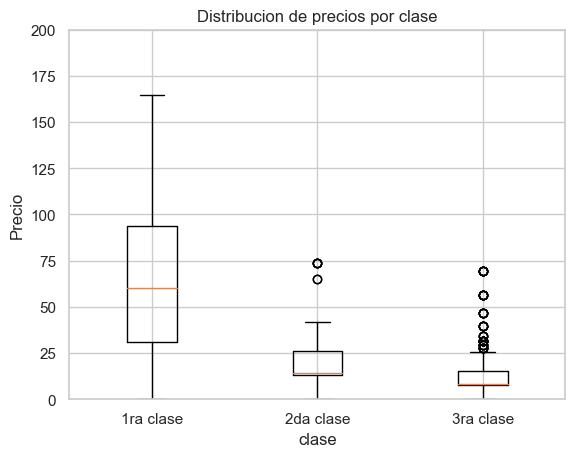

In [186]:
clase1 = titanic[titanic["clase"] == 1]["precio"]
clase2 = titanic[titanic["clase"] == 2]["precio"]
clase3 = titanic[titanic["clase"] == 3]["precio"]

fig, ax = plt.subplots()
ax.boxplot([clase1, clase2, clase3], labels = ["1ra clase", "2da clase", "3ra clase"])
ax.set_xlabel("clase")
ax.set_ylabel("Precio")
ax.set_ylim([0, 200])
ax.set_title("Distribucion de precios por clase")
plt.show()

Correlación entre la edad y la tarifa: ¿Hay alguna correlación entre la edad del pasajero y la tarifa que pagó por su billete?

In [187]:
correlacion = titanic["edad"].corr(titanic["precio"])
correlacion

0.09606669176903894

In [188]:
correlacion = titanic["clase"].corr(titanic["precio"])
correlacion

-0.5494996199439082

C:\Users\Tamara Campos\AppData\Local\Temp\ipykernel_5272\3816250947.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrizcorr = titanic.corr()


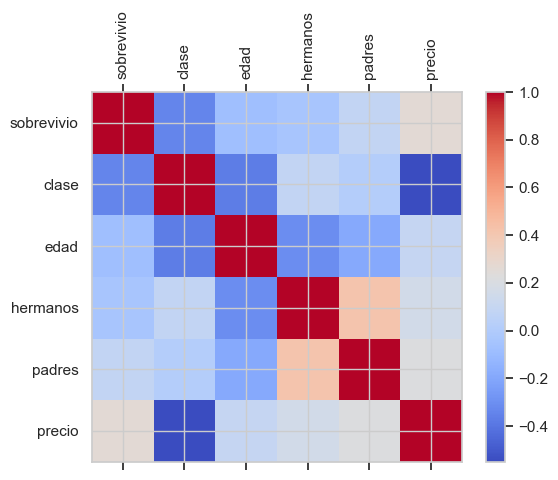

In [189]:
matrizcorr = titanic.corr()
fig, ax = plt.subplots()
cax = ax.matshow(matrizcorr, cmap='coolwarm')

# Agregar una barra de colores
fig.colorbar(cax)

# Configurar las etiquetas de los ejes
ax.set_xticks(range(len(matrizcorr.columns)))
ax.set_xticklabels(matrizcorr.columns, rotation=90)
ax.set_yticks(range(len(matrizcorr.columns)))
ax.set_yticklabels(matrizcorr.columns)

# Mostrar el gráfico
plt.show()

Histograma de la edad de los pasajeros según su género: ¿Cómo se distribuyen las edades de los pasajeros según su género?

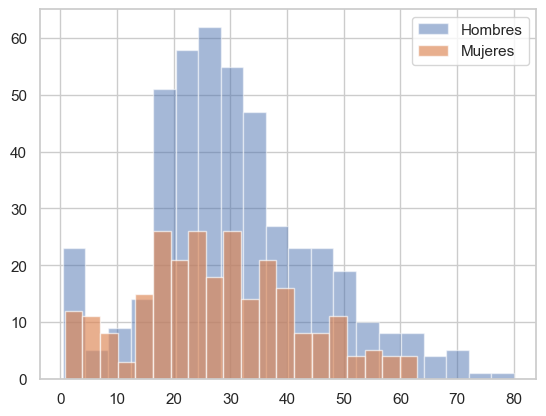

In [190]:
titanic_hombres = titanic[titanic["sexo"] == "male"]
titanic_mujeres = titanic[titanic["sexo"] == "female"]

plt.hist(titanic_hombres["edad"], bins = 20, alpha = 0.5, label = "Hombres")
plt.hist(titanic_mujeres["edad"], bins = 20, alpha = 0.65, label = "Mujeres")
plt.legend(loc = "upper right")
plt.show()

Probabilidad de sobrevivir según el género y la clase del billete: ¿Cuál es la probabilidad de que un pasajero sobreviva al Titanic, dado que es mujer y tiene un billete de primera clase? 

In [191]:
sob_mujer_1 = titanic.loc[(titanic['sobrevivio'] == 1) & (titanic['sexo'] == 'female') & (titanic['clase'] == 1)].shape[0] / titanic.loc[(titanic['sexo'] == 'female') & (titanic['clase'] == 1)].shape[0]
print(f"La probabilidad de sobrevivir al Titanic, dado que es mujer y tiene un billete de primera clase, es de {sob_mujer_1:.2f}.")


La probabilidad de sobrevivir al Titanic, dado que es mujer y tiene un billete de primera clase, es de 0.97.


Test de hipótesis sobre la media de la edad de los pasajeros: ¿Podemos afirmar que la edad media de los pasajeros del Titanic es diferente a 30 años?

In [192]:
media_edad = np.mean(titanic['edad'])
t_statistic, p_value = stats.ttest_1samp(titanic['edad'], 30)

if p_value < 0.05:
    print(f"Rechazamos la hipótesis nula de que la edad media es de 30 años (p-value = {p_value:.2f}).")
else:
    print(f"No podemos rechazar la hipótesis nula de que la edad media es de 30 años (p-value = {p_value:.2f}).")


No podemos rechazar la hipótesis nula de que la edad media es de 30 años (p-value = nan).


## Personal del Ministerio de Defensa en Agosto de 2019

In [193]:
personal = pd.read_csv("./personal-agosto-2019.csv", encoding = "Windows 1252", sep = ",")
personal.sort_values(by="apellidos_1", inplace = True)

personal.head(2)

,apellidos_1,apellidos_2,apellidos_3,apellidos_4,nombres_1,nombres_2,nombres_3,cuil,modalidad_vinculacion,cargo_nivel,funcion_ejecutiva,sede,escalafon_descripcion
14,Abraguin,NaN,NaN,NaN,Maria,Barbara,NaN,27252515017,Contrato Dcto. N 1421/02,B,NaN,MD,303 - SINEP
15,Acevey,NaN,NaN,NaN,Dora,Claudia,NaN,27062072917,Planta Permanente,B,NaN,MD,303 - SINEP


Traer la cantidad de personal por su nivel de cargo.

In [194]:
personal_cargo = personal.groupby("cargo_nivel").size()
personal_cargo_filtrado = personal_cargo[personal_cargo > 50]
personal_cargo_filtrado

cargo_nivel
A     62
B    151
C    150
D    186
E    122
dtype: int64

Crear un grafico donde se presenten el personal por cargo donde la cantidad es mayor a 50.

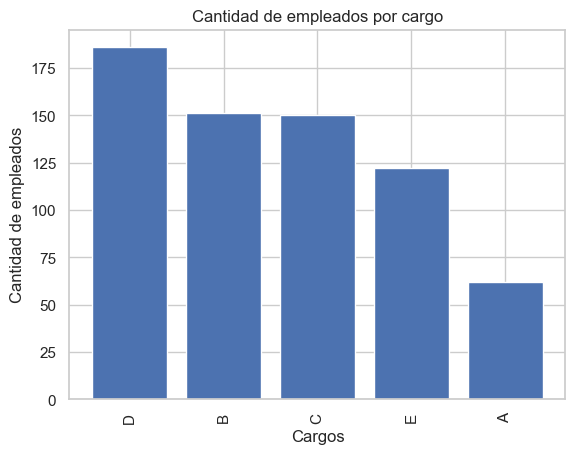

In [195]:
cantidad_cargo = personal["cargo_nivel"].value_counts()
cantidad_cargo = cantidad_cargo[cantidad_cargo > 50]
plt.bar(cantidad_cargo.index, cantidad_cargo.values)
plt.title("Cantidad de empleados por cargo")
plt.ylabel("Cantidad de empleados")
plt.xlabel("Cargos")
plt.xticks(rotation = 90)
plt.show()

Calcular el número de empleados por sede y graficar los resultados en un gráfico de barras.

In [196]:
personal_sede = personal.groupby("sede").size()
personal_sede

sede
MD     572
SHN    155
dtype: int64

Crear una tabla pivotante que muestre la cantidad de empleados por sede y nivel de cargo. Mostrar el resultado en un mapa de calor.

<AxesSubplot: xlabel='cargo_nivel', ylabel='sede'>

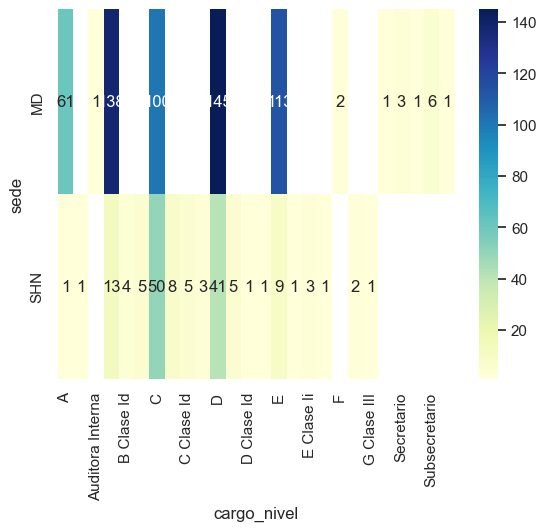

In [197]:
pivot_df = personal.groupby(["sede", "cargo_nivel"]).size().reset_index(name="cantidad")
pivot_table = pivot_df.pivot(index="sede", columns="cargo_nivel", values="cantidad")
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f")

Crear un gráfico de pastel que muestre la distribución de los empleados por modalidad de vinculación.

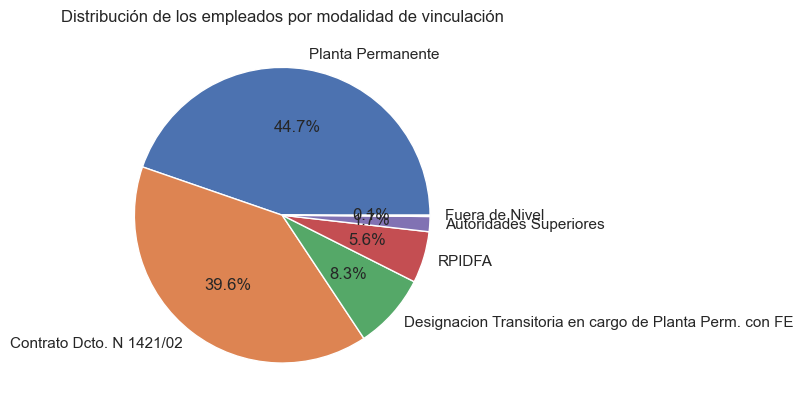

In [198]:
modalidad = personal["modalidad_vinculacion"]
cantidad_modalidad = modalidad.value_counts()
plt.pie(cantidad_modalidad.values, labels = cantidad_modalidad.index, autopct = "%1.1f%%")
plt.title("Distribución de los empleados por modalidad de vinculación")
plt.show()

Utilizar la biblioteca seaborn para crear un gráfico de barras apiladas que muestre la cantidad de empleados por sede y nivel de cargo.

In [199]:
pivot_df = personal.groupby(["sede", "cargo_nivel"]).size().reset_index(name="cantidad")
pivot_table = pivot_df.pivot(index="sede", columns="cargo_nivel", values="cantidad")
pivot_df.sort_values(by="cargo_nivel").head(2)

,sede,cargo_nivel,cantidad
0,MD,A,61
12,SHN,A,1


In [200]:
pivot_table

cargo_nivel,A,A Clase Ii,Auditora Interna,B,B Clase Id,B Clase Ii,C,C Clase III,C Clase Id,C Clase Ii,...,E Clase Ii,E Clase li,F,F Clase Id,G Clase III,Ministro,Secretario,Subsecretaria,Subsecretario,Titular de la Unidad deCoord. Gral.
sede,,,,,,,,,,,,,,,,,,,,,
MD,61.0,NaN,1.0,138.0,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,1.0,3.0,1.0,6.0,1.0
SHN,1.0,1.0,NaN,13.0,4.0,5.0,50.0,8.0,5.0,3.0,...,3.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [203]:
sns.set(style="whitegrid")
sns.barplot(x="cargo_nivel", y=pivot_table.columns.values.tolist(), data=pivot_table, palette="deep")
plt.xticks(rotation=90)
plt.ylabel("Cantidad de empleados")
plt.xlabel("Sede")
plt.title("Cantidad de empleados por sede y nivel de cargo")
plt.show()


ValueError: Could not interpret input 'cargo_nivel'

Calcular la media, mediana y desviación estándar del salario de los empleados y mostrar los resultados en un gráfico de caja.

Crear un gráfico de líneas que muestre la evolución del número de empleados por año.

Filtrar el dataframe para incluir solo los empleados con salarios mayores que la mediana y graficar la distribución de salarios resultante en un histograma.

Crear una tabla pivotante que muestre el salario medio de los empleados por sede y nivel de cargo. Mostrar el resultado en un gráfico de barras horizontal.

Graficar un diagrama de dispersión que muestre la relación entre la edad de los empleados y su salario.